# Notebook 1 - IGTI - Módulo 1 - Mall Customers
- Autor: Caio Gabriel de Moraes
- Data : 14/05/2020
- LinkedIn: https://www.linkedin.com/in/caio-moraes-8026a6158/

## Carregando as Bibliotecas

In [8]:
# import de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# import para a manipulação dos dados
import pandas as pd
import numpy as np
import scipy

# import para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# import para o preprocessamento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# especificando quais nós devem ser executados interativamente
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# declarando o tamanho maximo das linhas e colunas
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [7]:
# versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Notebook 1 - Módulo 1 - Caio Moraes" --iversions

seaborn    0.10.1
numpy      1.18.1
pandas     1.0.3
matplotlib 3.2.0
Notebook 1 - Módulo 1 - Caio Moraes


## Criando as Funções

In [115]:
# função para verificar valores missing no dataset
def check_missing(df, display=10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({"Missing n": temp_df.isnull().sum(), "% Missing": df_nan})
    if missing_data["Missing n"].sum() == 0:
        return print("Ótimo! Não há mais valores faltantes neste dataset.")
    else:
        return missing_data.sort_values("% Missing", ascending=False).head(display)


# função para ver os valores distintos
def unique_values(df):
    print("-" * 40)
    for c in df.columns:
        print("Coluna: {0}".format(c))
        print()
        print("Valores Únicos:")
        print(df[c].unique())
        print()
        print("Quantidade: {0}".format(df[c].nunique()))
        print("-" * 40)

## Trabalhando com o Dataset

In [10]:
# carregando o dataset
df_customers = pd.read_csv('Mall_Customers.csv')

In [11]:
# mostrando o dataset
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# mostrando a dimensão do dataset
df_customers.shape

(200, 5)

In [13]:
# mostrando a informação do dataset
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [116]:
# mostrando os valores únicos do dataset
unique_values(df_customers)

----------------------------------------
Coluna: CustomerID

Valores Únicos:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]

Quantidade: 200
----------------------------------------
Coluna: Genre

Valores Únicos:
['Male' 'Female']

Qu

### Observações

- São 200 registros e 5 features diferentes:
    - CustomerID == ID Cliente: (Índice do 1 até 200) 
    - Genre == Genêro: (Male / Female)
    - Age == Idade: (51 idades diferentes dos 18 até os 65)
    - Annual Income == Rendimento Anual: (64 rendimentos diferentes medidos em ks dos 15 até 137)
    - Spending Score == Pontuação de Gastos (84 pontuações diferentes do 1 até os 99)
- Sendo 4 delas do tipo int64 e 1 do tipo object:
    - CustomerID == ID Cliente: int64
    - Genre == Genêro: object
    - Age == Idade: int64
    - Annual Income == Rendimento Anual: int64
    - Spending Score == Pontuação de Gastos int64

## Análise Exploratória dos Dados

In [42]:
# mostrando a descrição do dataset
df_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna 

In [43]:
# verificando se existe valores nulos
check_missing(df_customers, display=8)

Ótimo! Não há mais valores faltantes neste dataset.


In [57]:
# adicionando valores nulos
df_customers_null = df_customers.copy()
for col in df_customers_null.columns:
    df_customers_null.loc[df_customers_null.sample(frac=0.1).index, col] = np.nan

# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

,Missing n,% Missing
CustomerID,20,10.0
Genre,20,10.0
Age,20,10.0
Annual Income (k$),20,10.0
Spending Score (1-100),20,10.0


In [59]:
# deletando as linhas que possuem algum valor nulo
df_customers_null.dropna(inplace=True)

# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

Ótimo! Não há mais valores faltantes neste dataset.


In [62]:
# adicionando valores nulos
df_customers_null = df_customers.copy()
for col in df_customers_null.columns:
    df_customers_null.loc[df_customers_null.sample(frac=0.1).index, col] = np.nan
    
# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

,Missing n,% Missing
CustomerID,20,10.0
Genre,20,10.0
Age,20,10.0
Annual Income (k$),20,10.0
Spending Score (1-100),20,10.0


In [64]:
# preenchendo os valores nan com o valor 0
df_customers_null.fillna(0, inplace=True)

# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

Ótimo! Não há mais valores faltantes neste dataset.


In [75]:
# adicionando valores nulos
df_customers_null = df_customers.copy()
for col in df_customers_null.columns:
    df_customers_null.loc[df_customers_null.sample(frac=0.1).index, col] = np.nan
    
# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

,Missing n,% Missing
CustomerID,20,10.0
Genre,20,10.0
Age,20,10.0
Annual Income (k$),20,10.0
Spending Score (1-100),20,10.0


In [80]:
# preenchendo os valores nan com os valores médios da coluna
df_customers_null.fillna(df_customers_null.mean(), inplace=True)

# verificando se existe valores nulos
check_missing(df_customers_null, display=5)

Ótimo! Não há mais valores faltantes neste dataset.


### Observações
- Verificamos se o dataset tem valores nulos
- Nosso dataset original não contém nenhum registro nulo
- Criamos um novo dataset, acrescentando valores nulos
- Verificamos se o dataset tem valores nulos
- Removemos todos os valores nulos com o dropna
- Criamos um novo dataset, acrescentando valores nulos
- Verificamos se o dataset tem valores nulos
- Substituimos os valores nulos pelo valor 0 com o fillna
- Criamos um novo dataset, acrescentando valores nulos
- Verificamos se o dataset tem valores nulos
- Substituimos os valores nulos pela media da feature com o fillna

### Verificando Anômalias (Outiliers)

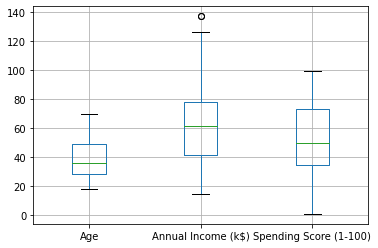

In [83]:
# constroi o boxplot para as colunas desejadas(Age, Annual Income(k$), Spending Score(1-100))
colunas = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df_customers.boxplot(column=colunas)

In [85]:
# Z-score
z = np.abs(scipy.stats.zscore(df_customers["Annual Income (k$)"].values))
threshold = 2
result = np.where(z > threshold)
df_salario_outlier = df_customers.iloc[result[0]]

# mostrando o dataset com anômalias(outliers)
df_salario_outlier

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Observações
- A feature Annual Income possui 8 valores de anômalias (outliers)
- Valores acima de 120 da feature Annual Income são considerados anômalias (outliers)
- As anômalias (outliers) são do índice 192 até 199

### Explorando os Dados

Text(0.5, 1.0, 'Distribuição dos clientes quanto ao gênero')

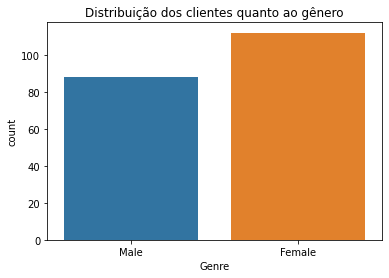

In [86]:
# analisando a distribuição dos clientes por gênero
sns.countplot(x="Genre", data=df_customers)
plt.title("Distribuição dos clientes quanto ao gênero")

In [88]:
# verificando a quantidade de valores da coluna genêro
df_customers["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

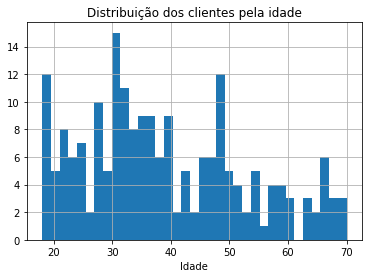

In [87]:
# analisando a distribuição dos clientes quanto a idade através do histograma
df_customers.hist("Age", bins=35)  # seleciona a coluna idade para realizar o histograma
# "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title("Distribuição dos clientes pela idade");  # adiciona o título ao gráfico (histograma)
plt.xlabel("Idade");

In [89]:
# verificando a quantidade de valores da coluna idade
df_customers["Age"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

### Observações
- Temos mais clientes do genêro feminino do que masculino (112 female / 88 male)
- Temos mais clientes na faixa etária de idade dos 30 anos
- Temos menos clientes na faixa etária de idade dos 50 a 60 anos

### Aplicando a Codificação para os Dados

In [90]:
# copiando as colunas que são do tipo categoricas
cat_df_customers = df_customers.select_dtypes(include=["object"])

# mostrando o dataset com as colunas categóricas
cat_df_customers.head()

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female


In [93]:
# aplicando o mapeamento
replace_map = {"Genre": {"Female": 1, "Male": 2}}  # define o dicionário a ser utilizado (map)
labels = cat_df_customers["Genre"].astype("category").cat.categories.tolist()  # encontra a lista das variáveis categóricas
replace_map_comp = {"Genre": {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}}  # define o mapeamento

print(replace_map_comp)  # mostra o mapeamento

{'Genre': {'Female': 1, 'Male': 2}}


In [94]:
# realiza a cópia do dataset
cat_df_customers_replace = pd.read_csv("Mall_Customers.csv")

# aplica o mapeamento para o dataset
cat_df_customers_replace.replace(replace_map_comp, inplace=True)

# mostrando o dataset
cat_df_customers_replace.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Observações
- Criamos um novo dataset contendo todas as features do tipo object
- Temos apenas a feature Genre como tipo object
- Definimos o dicionario (map) a ser utilizado (Female == 1 / Male == 2)
- Transformamos a feature em tipo categórica
- Definimos o mapeamento
- Fizemos a cópia do dataset
- Aplicamos o mapeamento para o dataset
- Mostramos o novo dataset

### Aplicando o Label Encodering

**Manual**

In [96]:
# criando o dataset
cat_df_customers_le = pd.read_csv("Mall_Customers.csv")

# transformando a coluna Genre em categórica
cat_df_customers_le["Genre"] = pd.Categorical(cat_df_customers_le["Genre"])

# mostrando os tipos do dataset
cat_df_customers_le.dtypes

CustomerID                   int64
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [98]:
# mostrando o dataset
cat_df_customers_le.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
# pegando os códigos da coluna Genre
cat_df_customers_le["Genre"] = cat_df_customers_le["Genre"].cat.codes

# mostrando o dataset
cat_df_customers_le.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Sklearn**

In [100]:
# criando o dataset
customers_label = pd.read_csv("Mall_Customers.csv")

# criando o objeto do label encodering
le = LabelEncoder()

# aplicando a codificação para a coluna Genre
customers_label["Genre"] = le.fit_transform(customers_label["Genre"])

# mostrando o dataset
customers_label.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Observações
Aplicamos 2 tipos diferentes de label encodering:

**1) Manual:**
    - Criamos um novo dataset
    - Transformamos a coluna Genre em categórica com pd.Categorical
    - Mostramos o tipo das features no dataset
    - Mostramos o novo dataset sem a transformação
    - Fizemos a transformação pegando apenas os códigos da coluna Genre (Female == 0 / Male == 1)
    - Mostramos o novo dataset com a transformação
**2) Sklearn:**
    - Criamos o objeto do label encodering com sklearn
    - Criamos um novo dataset
    - Aplicamos a codificação para a feature Genre através do fit_transform
    - Mostramos o novo dataset com a transformação

### Aplicando o One Hot Encoding

**Manual**

In [105]:
# criando o dataset
cat_df_customers_ohe = pd.read_csv("Mall_Customers.csv")

# categoriza os dados aplicando o get dummies
cat_df_customers_ohe = pd.get_dummies(cat_df_customers_ohe)

# mostrando o dataset
cat_df_customers_ohe.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


**Sklearn**

In [111]:
# criando o dataset
customers_ohe = pd.read_csv("Mall_Customers.csv")

# criando o objeto do One Hot Encoding
ohe = OneHotEncoder()

# aplicando a codificação para a coluna Genre
customers_onehot = ohe.fit_transform(customers_ohe['Genre'].values.reshape(-1, 1)).toarray()

# mostrando a série customers_ohe
customers_onehot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [112]:
# mostra a dimensionalidade do dataset
customers_onehot.shape

(200, 2)

### Observações
Aplicamos 2 tipos diferentes de One Hot Encoding:

**1) Manual:**
    - Criamos um novo dataset
    - Transformamos a coluna Genre em categórica com Get Dummies
    - O Get Dummies transforma cada valor distinto em features
    - No nosso caso acrescentou duas features nova (Genre_Female / Genre_Male)
    - (0, 1) == Male / (1, 0) == Female
    - Mostramos o dataset com o Get Dummies
**2) Sklearn:**
    - Criamos um novo dataset
    - Criamos o objeto do One Hot Encoding com sklearn
    - Aplicamos a codificação para a feature Genre através do fit_transform
    - Mostramos a serie contendo 2 features (Genre_Female / Genre_Male)
    - Mostramos a dimensão da série (200 linhas e 2 features)

### Diferença entre Label Encodering e One Hot Encoding
- LabelEncoder pode ser usado para armazenar valores usando menos espaço em disco.
- A codificação One-Hot tem a vantagem de que o resultado é binário e não ordinal e que tudo fica em um espaço vetorial ortogonal.
- A codificação One-Hot tem a desvantagem que, para alta cardinalidade, o espaço de recursos pode explodir rapidamente e você começa a lutar com a maldição da dimensionalidade.
- Nesses casos, normalmente utilizo a codificação one-hot seguida pelo PCA para redução da dimensionalidade. Acho que a combinação criteriosa de PCA mais quente raramente pode ser superada por outros esquemas de codificação.
- O PCA encontra a sobreposição linear; portanto, tenderá naturalmente a agrupar recursos semelhantes no mesmo recurso.


**Vamos considerar quando aplicar OHE e quando aplicar Label Encoding ao criar modelos baseados em árvore.**

**1) Aplicamos OHE quando:**
    - Quando os valores que estão próximos um do outro na codificação do rótulo correspondem aos valores de destino que não estão próximos (dados não lineares).
    - Quando o recurso categórico não é ordinal (cachorro, gato, rato).
    
**2) Aplicamos LE quando:**
    - O recurso categórico é ordinal (Jr. kg, Sr. kg, escola primária, ensino médio, etc.).
    - Quando podemos criar um codificador de etiqueta que atribua etiquetas fechadas a categorias semelhantes : Isso leva a menos vazamentos na trança, reduzindo o tempo de execução.
    - Quando o número de recursos categóricos no conjunto de dados é enorme: a codificação de um recurso quente com um grande número de valores pode levar a (1) alto consumo de memória e (2) o caso em que recursos não categóricos raramente são usados pelo modelo. Você pode lidar com o 1º caso se empregar matrizes esparsas. O segundo caso pode ocorrer se você construir uma árvore usando apenas um subconjunto de recursos. Por exemplo, se você tiver 9 recursos numéricos e 1 categórico com 100 valores exclusivos e codificou esse recurso categórico uma vez, obterá 109 recursos. Se uma árvore for construída com apenas um subconjunto de recursos, os 9 recursos numéricos iniciais raramente serão usados. Nesse caso, você pode aumentar o tamanho do controle de parâmetro desse subconjunto. No xgboost, ele é chamado colsample_bytree, no Random Forest max_features do sklearn.